In [ ]:
# 1. Business Understanding: 
#    our goal is to construct an MLP to predict (on day t) the future stock close price  

In [ ]:
from time import process_time
t1_start = process_time()

In [ ]:
import os
import datetime as dt
import numpy as np
import pandas as pd

In [ ]:
os.getcwd() # get the current working directory

'/content'

In [ ]:
# 2. Data Acquisition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_folder = '/content/drive/MyDrive/MATH_6373/MATH_6373_HW_01/'
os.chdir(base_folder) # change the current working directory to

# SPDR S&P 500 ETF Trust; Apple Inc.; Microsoft Corporation; Amazon.com, Inc.
base_name = ['SPY', 'AAPL', 'MSFT', 'AMZN'] 

# read all entries in the list of "base name" into dataframe using for-loop
# noted that only csv file is accepted
for value in base_name:
     exec("{x} = pd.read_csv(f'{x}.csv')".format(x = value))

In [ ]:
# 3. Data Clean-up / Data Set-up

In [ ]:
def data_cleanup(symbol):
    # extract year, month, and day from datetime column using pandas
    date = pd.to_datetime(symbol.loc[:, 'Date'], format = '%Y-%m-%d')
    symbol['Year'] = date.dt.year
    symbol['Month'] = date.dt.month
    symbol['Day'] = date.dt.day
    
    # set multi-index on [symbol, year, month, day] to the data set
    symbol.set_index(['Year', 'Month', 'Day'], inplace = True)
    
    # possible different column names referring to close price in original data sets
    try:
        n = list(symbol.columns).index('Price')
    except:
        n = list(symbol.columns).index('Close')
    close_price = symbol.iloc[:, n]
    return(close_price)

In [ ]:
# create multiple dataframes in loop (for each entry in the list of "base_name")
# each one is close price of its own
for value in base_name:
     exec('{x} = data_cleanup(symbol = {x})'.format(x = value))

In [ ]:
# concatenate/combine multiple dataframes we have above horizontally
V_t = pd.concat([SPY, AAPL, MSFT, AMZN], axis = 1)
V_t.columns = ['SPY(t)', 'AAPL(t)', 'MSFT(t)', 'AMZN(t)']
V_t

SPY(t)     AAPL(t)     MSFT(t)      AMZN(t)
Year Month Day                                                 
1980 12    12          NaN    0.128348         NaN          NaN
           15          NaN    0.121652         NaN          NaN
           16          NaN    0.112723         NaN          NaN
           17          NaN    0.115513         NaN          NaN
           18          NaN    0.118862         NaN          NaN
...                    ...         ...         ...          ...
2021 1     28   377.630005  137.089996  238.929993  3237.620117
           29   370.070007  131.960007  231.960007  3206.199951
     2     1    376.230011  134.139999  239.649994  3342.879883
           2    381.549988  134.990005  239.509995  3380.000000
           3    381.850006  133.940002  243.000000  3312.530029

[10122 rows x 4 columns]

In [ ]:
ex1 = np.empty((1, len(V_t.columns)))
ex1[:] = np.nan
#ex2 = np.delete(np.array(V_t), obj = -1, axis = 0)
ex2 = np.array(V_t)[:-1,:]
V_t1 = pd.DataFrame(data = np.vstack([ex1, ex2]), 
                    columns = ['SPY(t-1)', 'AAPL(t-1)', 'MSFT(t-1)', 'AMZN(t-1)'],
                    index = V_t.index)
#V_t1

In [ ]:
ex1 = np.empty((2, len(V_t.columns)))
ex1[:] = np.nan
ex2 = np.array(V_t)[:-2,:]
V_t2 = pd.DataFrame(data = np.vstack([ex1, ex2]), 
                    columns = ['SPY(t-2)', 'AAPL(t-2)', 'MSFT(t-2)', 'AMZN(t-2)'],
                    index = V_t.index)
#V_t2

In [ ]:
ex1 = np.empty((3, len(V_t.columns)))
ex1[:] = np.nan
ex2 = np.array(V_t)[:-3,:]
V_t3 = pd.DataFrame(data = np.vstack([ex1, ex2]), 
                    columns = ['SPY(t-3)', 'AAPL(t-3)', 'MSFT(t-3)', 'AMZN(t-3)'],
                    index = V_t.index)
#V_t3

In [ ]:
ex1 = np.array(V_t.loc[:, 'SPY(t)'])[1:]
ex2 = np.array([np.nan])
Y_t = pd.DataFrame(data = np.hstack([ex1, ex2]), 
                   columns = ['SPY(t+1)'],
                   index = V_t.index)
#Y_t

In [ ]:
# combine 5 dataframes together, and then remove all the rows with missing data
df = pd.concat([Y_t, V_t, V_t1, V_t2, V_t3], axis = 1).dropna()
df

SPY(t+1)      SPY(t)  ...   MSFT(t-3)    AMZN(t-3)
Year Month Day                          ...                         
1997 5     20    84.281250   84.468750  ...   14.640625     1.958333
           21    84.000000   84.281250  ...   14.429688     1.729167
           22    84.781250   84.000000  ...   14.390625     1.708333
           23    85.125000   84.781250  ...   14.890625     1.635417
           27    85.109375   85.125000  ...   15.046875     1.427083
...                    ...         ...  ...         ...          ...
2021 1     27   377.630005  374.410004  ...  225.949997  3292.229980
           28   370.070007  377.630005  ...  229.529999  3294.000000
           29   376.230011  370.070007  ...  232.330002  3326.129883
     2     1    381.549988  376.230011  ...  232.899994  3232.580078
           2    381.850006  381.549988  ...  238.929993  3237.620117

[5966 rows x 17 columns]

In [ ]:
# download the dataset that is cleaned up 
# df.to_csv('df.csv')

In [ ]:
# 3.1. Data Selection

In [ ]:
# select only 1005 cases observed over most recent 4 years
df = df.iloc[-1005:,:]

# convert from strip values to float type
df = df.replace('[^\d.]', '', regex = True).astype(float)

df

SPY(t+1)      SPY(t)  ...   MSFT(t-3)    AMZN(t-3)
Year Month Day                          ...                         
2017 2     6    228.940002  228.929993  ...   63.580002   832.349976
           7    229.240005  228.940002  ...   63.169998   839.950012
           8    230.600006  229.240005  ...   63.680000   810.200012
           9    231.509995  230.600006  ...   63.639999   807.640015
           10   232.770004  231.509995  ...   63.430000   812.500000
...                    ...         ...  ...         ...          ...
2021 1     27   377.630005  374.410004  ...  225.949997  3292.229980
           28   370.070007  377.630005  ...  229.529999  3294.000000
           29   376.230011  370.070007  ...  232.330002  3326.129883
     2     1    381.549988  376.230011  ...  232.899994  3232.580078
           2    381.850006  381.549988  ...  238.929993  3237.620117

[1005 rows x 17 columns]

In [ ]:
# extract the true set 
Y = df.loc[:,'SPY(t+1)']
Y # true_set

Year  Month  Day
2017  2      6      228.940002
             7      229.240005
             8      230.600006
             9      231.509995
             10     232.770004
                       ...    
2021  1      27     377.630005
             28     370.070007
             29     376.230011
      2      1      381.549988
             2      381.850006
Name: SPY(t+1), Length: 1005, dtype: float64

In [ ]:
# create a new df as X that is removed the column of true set
X = df.drop(['SPY(t+1)'], axis = 1)
X

SPY(t)     AAPL(t)  ...   MSFT(t-3)    AMZN(t-3)
Year Month Day                          ...                         
2017 2     6    228.929993   32.572498  ...   63.580002   832.349976
           7    228.940002   32.882500  ...   63.169998   839.950012
           8    229.240005   33.009998  ...   63.680000   810.200012
           9    230.600006   33.105000  ...   63.639999   807.640015
           10   231.509995   33.029999  ...   63.430000   812.500000
...                    ...         ...  ...         ...          ...
2021 1     27   374.410004  142.059998  ...  225.949997  3292.229980
           28   377.630005  137.089996  ...  229.529999  3294.000000
           29   370.070007  131.960007  ...  232.330002  3326.129883
     2     1    376.230011  134.139999  ...  232.899994  3232.580078
           2    381.549988  134.990005  ...  238.929993  3237.620117

[1005 rows x 16 columns]

In [ ]:
# 4. Analysis & Modeling

In [ ]:
# split data set into a training set (80%) and a test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [ ]:
X_train

array([[-0.61015818, -0.65922691, -0.37354454, ..., -0.59900988,
        -0.35279333, -0.14565993],
       [ 0.07801987, -0.15112918, -0.37043957, ..., -0.10159738,
        -0.28738838,  0.30635011],
       [ 1.07463195,  1.2320308 ,  1.57117658, ...,  1.45710573,
         1.78036639,  2.01354158],
       ...,
       [ 0.07257851, -0.37556169,  0.17892607, ..., -0.32355747,
         0.2243948 ,  0.03318628],
       [ 0.24154424, -0.32360449,  0.06487175, ..., -0.294038  ,
        -0.02326901,  0.14637622],
       [ 0.42769312,  0.03990876,  0.27538596, ...,  0.01948878,
         0.25626407, -0.02099373]])

In [ ]:
Y_train

Year  Month  Day
2018  12     11     265.459991
      9      6      287.600006
2020  7      23     320.880005
      5      11     286.670013
      7      16     321.720001
                       ...    
      6      2      312.179993
2017  11     8      258.170013
2019  8      7      293.619995
      4      29     294.019989
      10     24     301.600006
Name: SPY(t+1), Length: 804, dtype: float64

In [ ]:
X_test

array([[ 0.75044721,  0.23187962,  0.4743085 , ...,  0.24304717,
         0.5395468 , -0.00473119],
       [ 0.32459511, -0.14301387,  0.25654933, ..., -0.16364471,
         0.27563577, -0.04597895],
       [-0.58094745, -0.60232601, -0.69459418, ..., -0.61282951,
        -0.69252426, -0.52479063],
       ...,
       [ 0.42167934, -0.18097902,  0.20066065, ..., -0.13957792,
         0.20814773,  0.03282585],
       [-1.0374414 , -0.72573579, -1.07380963, ..., -0.719438  ,
        -1.09828482, -1.20012401],
       [-0.23786043, -0.47070753, -0.54866257, ..., -0.43392648,
        -0.51693068, -0.1462942 ]])

In [ ]:
Y_test

Year  Month  Day
2019  12     2      309.549988
      9      30     293.239990
2018  4      13     267.329987
      7      6      277.899994
2019  5      15     287.700012
                       ...    
      12     23     321.230011
2017  12     12     266.750000
2019  9      16     300.920013
2017  9      11     250.050003
2018  6      15     276.559998
Name: SPY(t+1), Length: 201, dtype: float64

In [ ]:
print(
    X_train.shape, 
    Y_train.shape, 
    X_test.shape, 
    Y_test.shape
)

(804, 16) (804,) (201, 16) (201,)


In [ ]:
# PRINCIPLE COMPONENT ANALYSIS (PCA)

from sklearn import *

# standardized dataset
SX = preprocessing.scale(X) # from sklearn package

# correlation matrix using method of pearson (standard correlation coefficient)
R = X.corr(method = 'pearson').to_numpy()

# D refers to eigenvalues, and W refers to eigenvectors
D, Q = np.linalg.eig(R)

# prop = float(input('enter the proportion of variance explained: '))
prop = 0.99
s = abs(np.cumsum(D)/sum(D) - prop)
p = s.tolist().index(sorted(s, reverse = False)[0]) + 1

V = Q[:,0:p]

X_pca = pd.DataFrame(data = np.dot(SX, V), # SX.dot(V)
                     index = X.index)
X_pca

0         1         2
Year Month Day                              
2017 2     6   -5.426512 -0.539754 -0.699890
           7   -5.418801 -0.518395 -0.713647
           8   -5.406817 -0.496780 -0.729175
           9   -5.384265 -0.488472 -0.734874
           10  -5.352925 -0.465951 -0.728831
...                  ...       ...       ...
2021 1     27   9.969002  0.871915 -1.331835
           28   9.962325  0.795063 -1.294605
           29   9.741833  0.669610 -1.177010
     2     1    9.648983  0.569146 -1.025783
           2    9.720636  0.602158 -0.832411

[1005 rows x 3 columns]

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize = (16, 9))
#plt.scatter(X_pca.iloc[:,0], X_pca.iloc[:,1])
#plt.xlabel('first principle component')
#plt.ylabel('second principle component')
#plt.title('Scatterplot of 1st PC and 2nd PC')
#plt.grid()
#plt.show()
# plt.savefig('Figure_01.png')

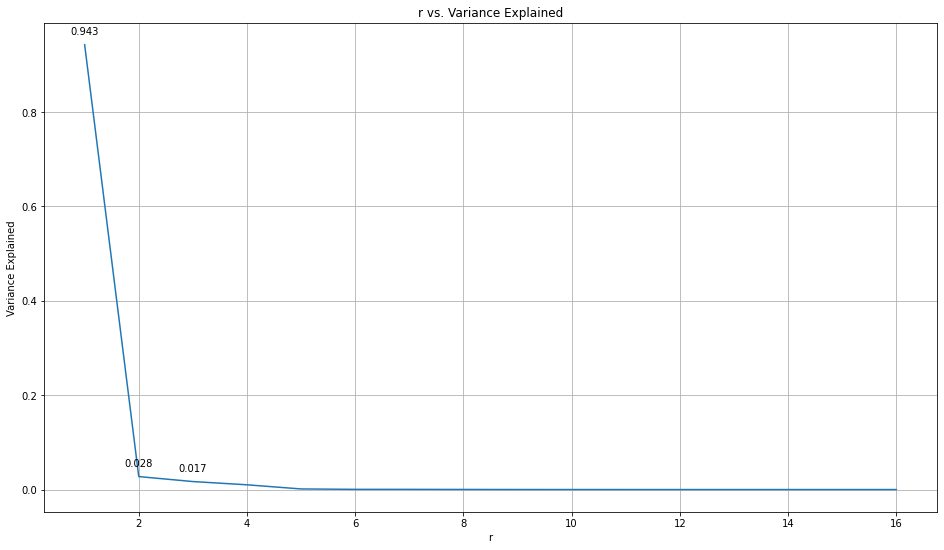

In [ ]:
ys = D/sum(D)
xs = np.linspace(1, len(ys), len(ys))

plt.figure(figsize = (16, 9))
plt.plot(xs, ys)
for x, y in zip(xs[0:p], ys[0:p]):
    label = '{:.3f}'.format(y)
    plt.annotate(label, (x, y), textcoords = 'offset points', xytext = (0, 10), ha = 'center')  
plt.xlabel('r')
plt.ylabel('Variance Explained')
plt.title('r vs. Variance Explained')
plt.grid()
plt.show()
# plt.savefig('Figure_02.png')

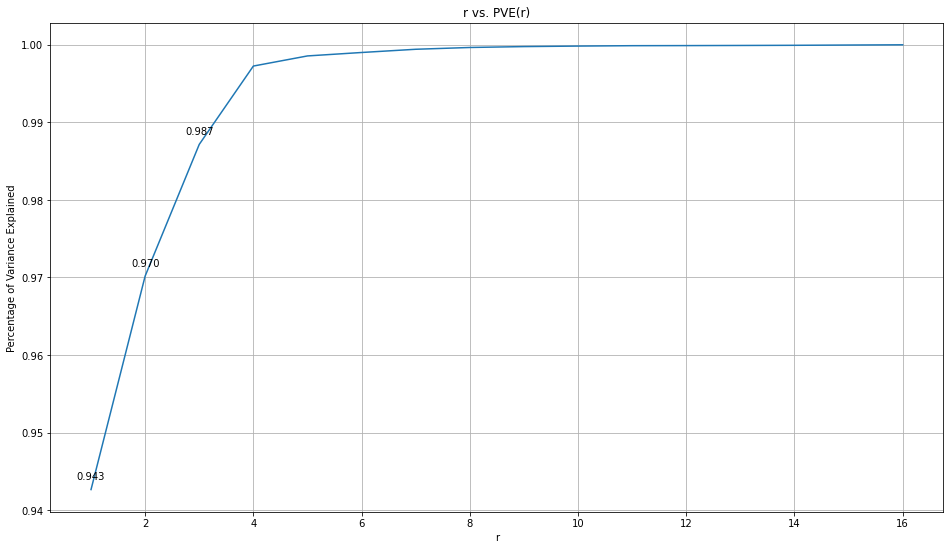

In [ ]:
ys = np.cumsum(D)/sum(D)
xs = np.linspace(1, len(ys), len(ys))

plt.figure(figsize = (16, 9))
plt.plot(xs, ys)
for x, y in zip(xs[0:p], ys[0:p]):
    label = '{:.3f}'.format(y)
    plt.annotate(label, (x, y), textcoords = 'offset points', xytext = (0, 10), ha = 'center')
plt.xlabel('r')
plt.ylabel('Percentage of Variance Explained')
plt.title('r vs. PVE(r)')
plt.grid()
plt.show()
# plt.savefig('Figure_03.png')

In [ ]:
# MULTILAYER PERCEPTRON (MLP) for Prediction: 3 layers Architecture

In [ ]:
# hmin = number of principal components for proportion of explained variance 
# dim_input * h + h + h + 1 = number of MLP parameters <= number of cases of training set
hmin = len(X_pca.columns)
hmax = int((X_train.shape[0] - 1)/(X_train.shape[1] + 1 + 1))
# Select 4 values for h as a size of hidden layer 
from random import sample
h = sample(list(range(hmin + 1, hmax + 1)), k = 2)

# hyperparameters
n_input = len(X.columns) # dimension of input layer
# dimension of hidden layer
n_h1 = hmin
n_h2 = sorted(h)[0]
n_h3 = sorted(h)[1]
n_h4 = hmax
#n_hidden = sample([n_h1, n_h2, n_h3, n_h4], k = 1)[0]
n_output = 1 # dimension of output layer

In [ ]:
[n_h1, n_h2, n_h3, n_h4]

[3, 4, 6, 44]

In [ ]:
for n_hidden in [n_h1, n_h2, n_h3, n_h4]:
  from tensorflow.keras import optimizers, losses
  # tune the learning rate
  # the default of learning_rate is 0.001, we can change it to 0.01 to fasten the training procedure
  optimizer = optimizers.Adam(learning_rate = 0.01)
  loss_fn = losses.MeanSquaredError()

  from tensorflow.keras import callbacks
  import tensorflow as tf
  # for recording training loss over the whole training set at the end of each epoch
  class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs = None):
      self.gradient = []
      self.gradsNorm = []
      self.batch_loss = []
      self.epoch_loss = [] 
    def on_epoch_end(self, epoch, logs = None):
      with tf.GradientTape() as tape:
        Y_batch_pred = model(X_train, training = True)
        loss_val = loss_fn(Y_train,Y_batch_pred)
      grads = tape.gradient(loss_val, model.trainable_weights)
      self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grads])))
      self.gradient.append(grads)
      self.batch_loss.append(loss_val.numpy())
      epoch_loss_value = model.evaluate(X_train, Y_train, verbose = 0)
      self.epoch_loss.append(epoch_loss_value)
  
  exec("MyMonitor_{x} = MyHistory()".format(x = n_hidden))

  # for saving the best model during the whole training process
  checkpointer = callbacks.ModelCheckpoint(
      filepath = 'BestModel.h5', 
      monitor = 'val_loss', 
      save_best_only = True
  )

  from tensorflow.keras.models import Sequential
  from tensorflow import keras
  from tensorflow.keras.layers import Dense
  model = Sequential()
  model.add(keras.layers.Input(
      shape = (n_input, )
  )) 
  model.add(Dense(
      units = n_hidden, 
      activation = 'relu'
  ))
  model.add(Dense(
      units = n_output, 
      activation = 'relu'
  ))
  
  exec("model_summary_{x} = model.summary()".format(x = n_hidden))

  from tensorflow.keras.utils import plot_model
  exec("plot_{x} = plot_model(model = model, show_shapes = True, show_layer_names = True)".format(x = n_hidden))

  # len(X.columns)*n_hidden matrix of weights of arrow w(j,k) from input layer to hidden layer
  exec("W_{x} = model.layers[0].get_weights()[0]".format(x = n_hidden))
  # column vector [b_j] of all thresholds for hidden neurons j in hidden layer
  exec("B_{x} = model.layers[0].get_weights()[1]".format(x = n_hidden))
  # column matrix of weights m(1, j) from hidden neuron j to output neuron 1
  exec("M_{x} = model.layers[1].get_weights()[0]".format(x = n_hidden))
  # single threshold for a single output neuron
  exec("C_{x} = model.layers[1].get_weights()[1]".format(x = n_hidden))

  model.compile(optimizer = optimizer, loss = loss_fn)

  exec("Monitor_{x} = model.fit(x = X_train, y = Y_train, epochs = 100, batch_size = 25, validation_data = (X_test, Y_test), callbacks = [checkpointer, MyMonitor_{x}])".format(x = n_hidden))

  exec("training_loss_{x} = MyMonitor_{x}.epoch_loss".format(x = n_hidden))
  exec("validation_loss_{x} = Monitor_{x}.history['val_loss']".format(x = n_hidden))
  exec("batch_loss_{x} = MyMonitor_{x}.batch_loss".format(x = n_hidden))
  exec("grads_N_{x} = MyMonitor_{x}.gradsNorm".format(x = n_hidden))

  exec("last_epoch = len(pd.DataFrame(Monitor_{x}.history).index)".format(x = n_hidden))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 51        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 1s 17ms/step - loss: 81332.3479 - val_loss: 84644.3750
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 82257.8621 - val_loss: 82625.3125
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 79531.6326 - val_loss: 79238.4922
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 75073.2475 - val_loss: 74821.4609
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 72514.0848 - val_los

In [ ]:
plot_h1 = eval("plot_{x}".format(x = n_h1))
plot_h2 = eval("plot_{x}".format(x = n_h2))
plot_h3 = eval("plot_{x}".format(x = n_h3))
plot_h4 = eval("plot_{x}".format(x = n_h4))

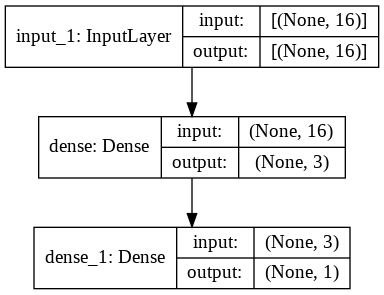

In [ ]:
plot_h1

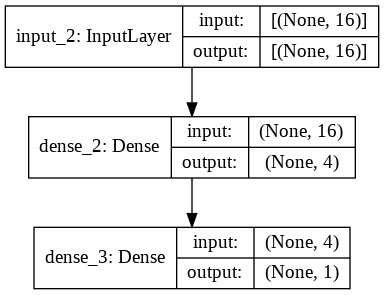

In [ ]:
plot_h2

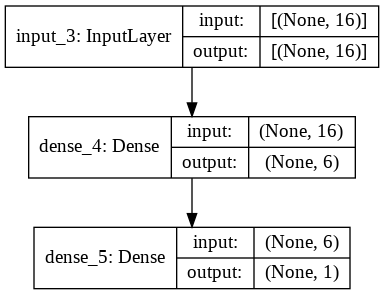

In [ ]:
plot_h3

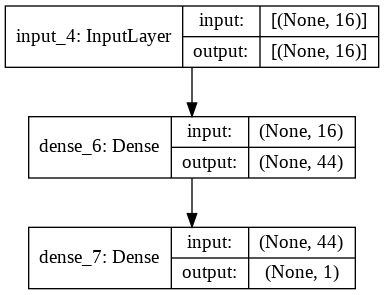

In [ ]:
plot_h4

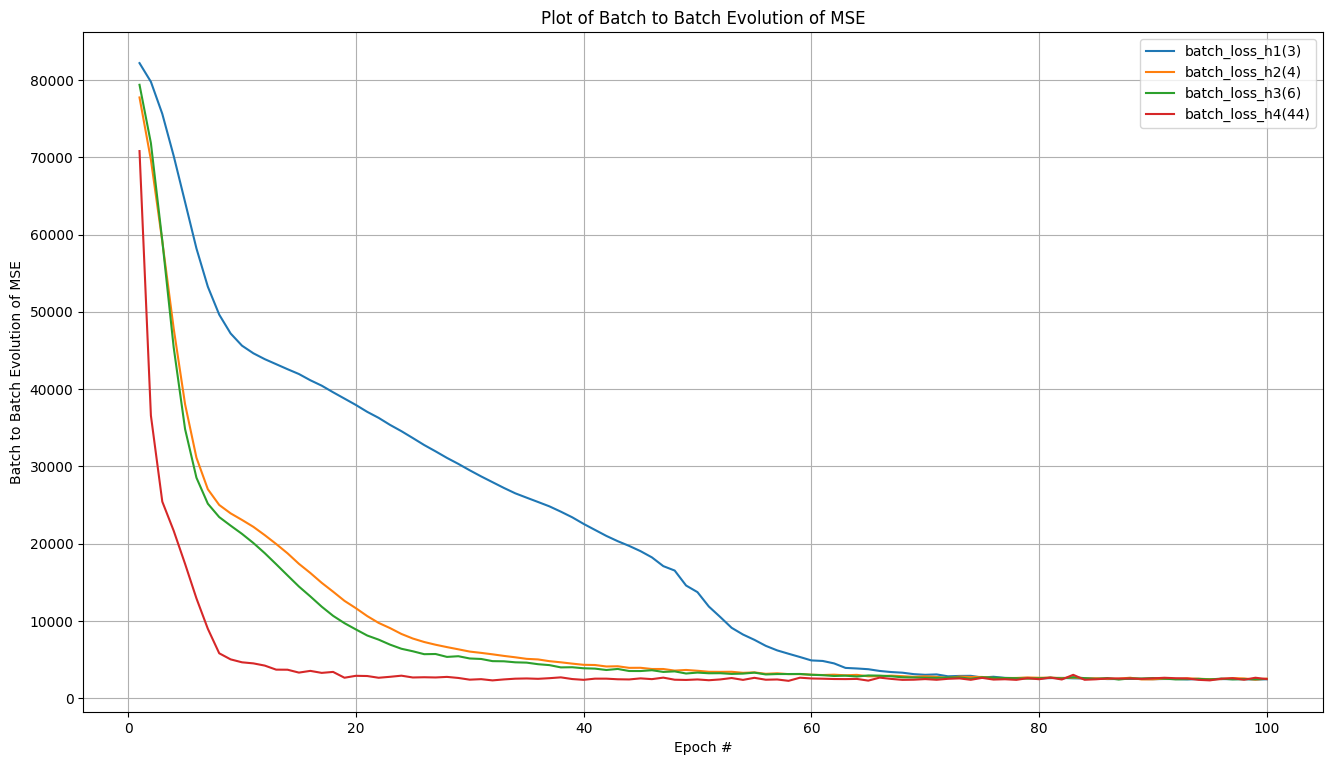

In [ ]:
# plot of batch to batch evolution of MSE
plt.figure(figsize = (16, 9), dpi=100)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("batch_loss_{x}".format(x = n_h1)),
    label = "batch_loss_h1({x})".format(x = n_h1)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("batch_loss_{x}".format(x = n_h2)),
    label = "batch_loss_h2({x})".format(x = n_h2)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("batch_loss_{x}".format(x = n_h3)),
    label = "batch_loss_h3({x})".format(x = n_h3)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("batch_loss_{x}".format(x = n_h4)),
    label = "batch_loss_h4({x})".format(x = n_h4)
)
plt.xlabel('Epoch #')
plt.ylabel('Batch to Batch Evolution of MSE')
plt.title('Plot of Batch to Batch Evolution of MSE')
plt.legend() 
plt.grid()
plt.show()

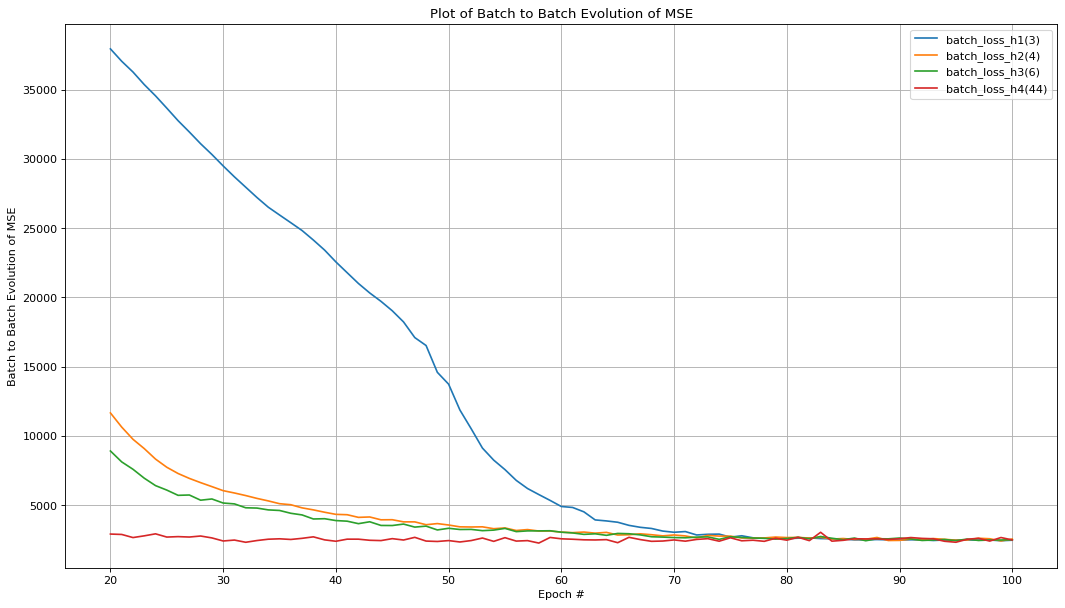

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("batch_loss_{x}[(20 - 1):]".format(x = n_h1)),
    label = "batch_loss_h1({x})".format(x = n_h1)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("batch_loss_{x}[(20 - 1):]".format(x = n_h2)),
    label = "batch_loss_h2({x})".format(x = n_h2)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("batch_loss_{x}[(20 - 1):]".format(x = n_h3)),
    label = "batch_loss_h3({x})".format(x = n_h3)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("batch_loss_{x}[(20 - 1):]".format(x = n_h4)),
    label = "batch_loss_h4({x})".format(x = n_h4)
)
plt.xlabel('Epoch #')
plt.ylabel('Batch to Batch Evolution of MSE')
plt.title('Plot of Batch to Batch Evolution of MSE')
plt.legend() 
plt.grid()
plt.show()

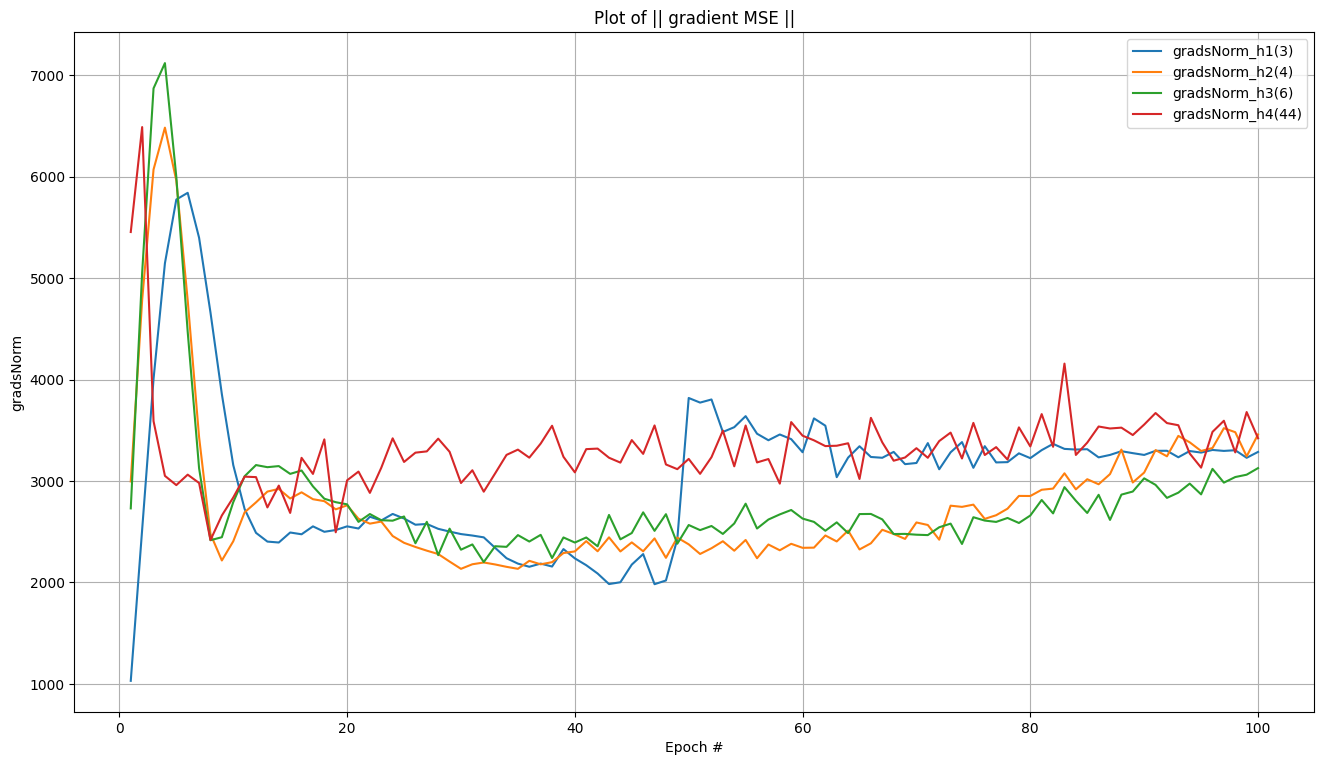

In [ ]:
# Plot of || gradient MSE ||
plt.figure(figsize = (16, 9), dpi = 100)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("grads_N_{x}".format(x = n_h1)),
    label = 'gradsNorm_h1({x})'.format(x = n_h1)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("grads_N_{x}".format(x = n_h2)),
    label = 'gradsNorm_h2({x})'.format(x = n_h2)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("grads_N_{x}".format(x = n_h3)),
    label = 'gradsNorm_h3({x})'.format(x = n_h3)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("grads_N_{x}".format(x = n_h4)),
    label = 'gradsNorm_h4({x})'.format(x = n_h4)
)
plt.xlabel('Epoch #')
plt.ylabel('gradsNorm')
plt.title('Plot of || gradient MSE ||')
plt.legend() 
plt.grid()
plt.show()


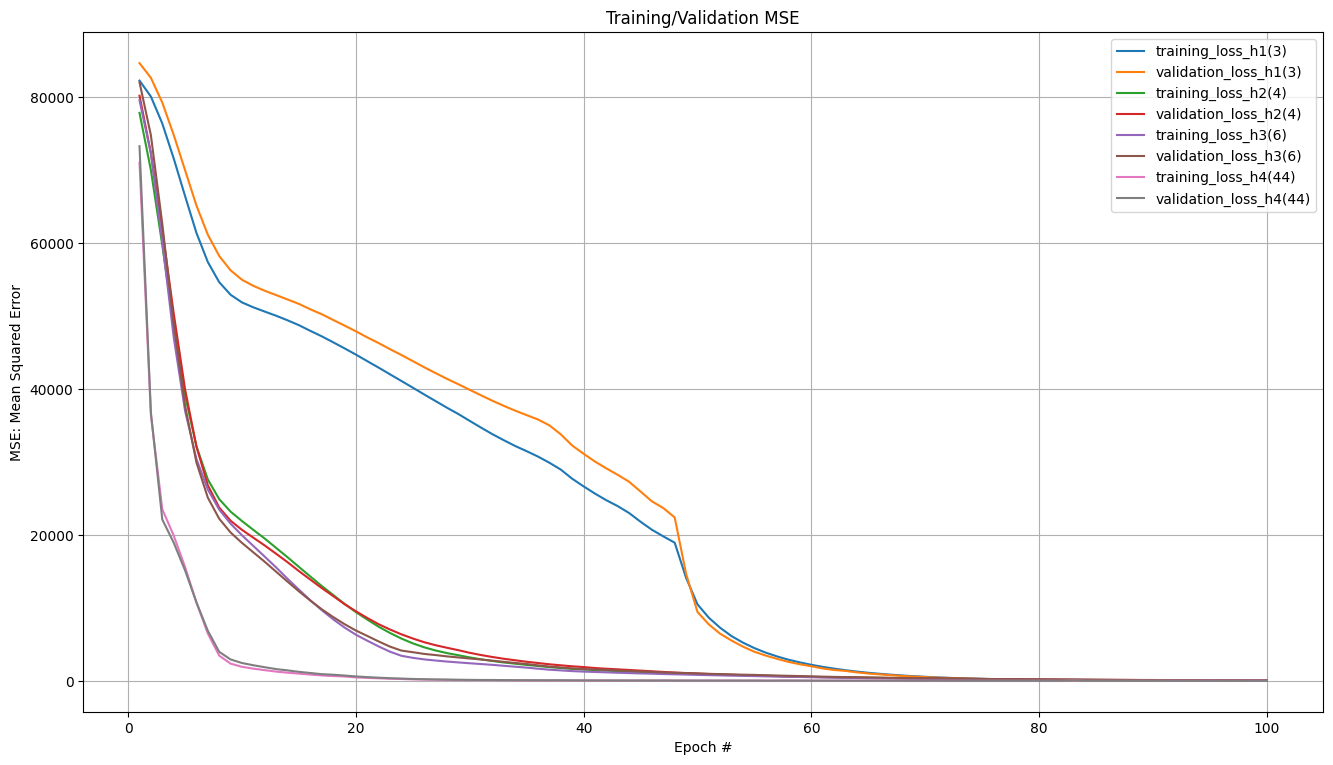

In [ ]:
# error plot
plt.figure(figsize = (16, 9), dpi = 100)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("training_loss_{x}".format(x = n_h1)),
    label = 'training_loss_h1({x})'.format(x = n_h1)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("validation_loss_{x}".format(x = n_h1)),
    label = 'validation_loss_h1({x})'.format(x = n_h1)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("training_loss_{x}".format(x = n_h2)),
    label = 'training_loss_h2({x})'.format(x = n_h2)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("validation_loss_{x}".format(x = n_h2)),
    label = 'validation_loss_h2({x})'.format(x = n_h2)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("training_loss_{x}".format(x = n_h3)),
    label = 'training_loss_h3({x})'.format(x = n_h3)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("validation_loss_{x}".format(x = n_h3)),
    label = 'validation_loss_h3({x})'.format(x = n_h3)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("training_loss_{x}".format(x = n_h4)),
    label = 'training_loss_h4({x})'.format(x = n_h4)
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    eval("validation_loss_{x}".format(x = n_h4)),
    label = 'validation_loss_h4({x})'.format(x = n_h4)
)
plt.xlabel('Epoch #')
plt.ylabel('MSE: Mean Squared Error')
plt.title('Training/Validation MSE')
plt.legend() 
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

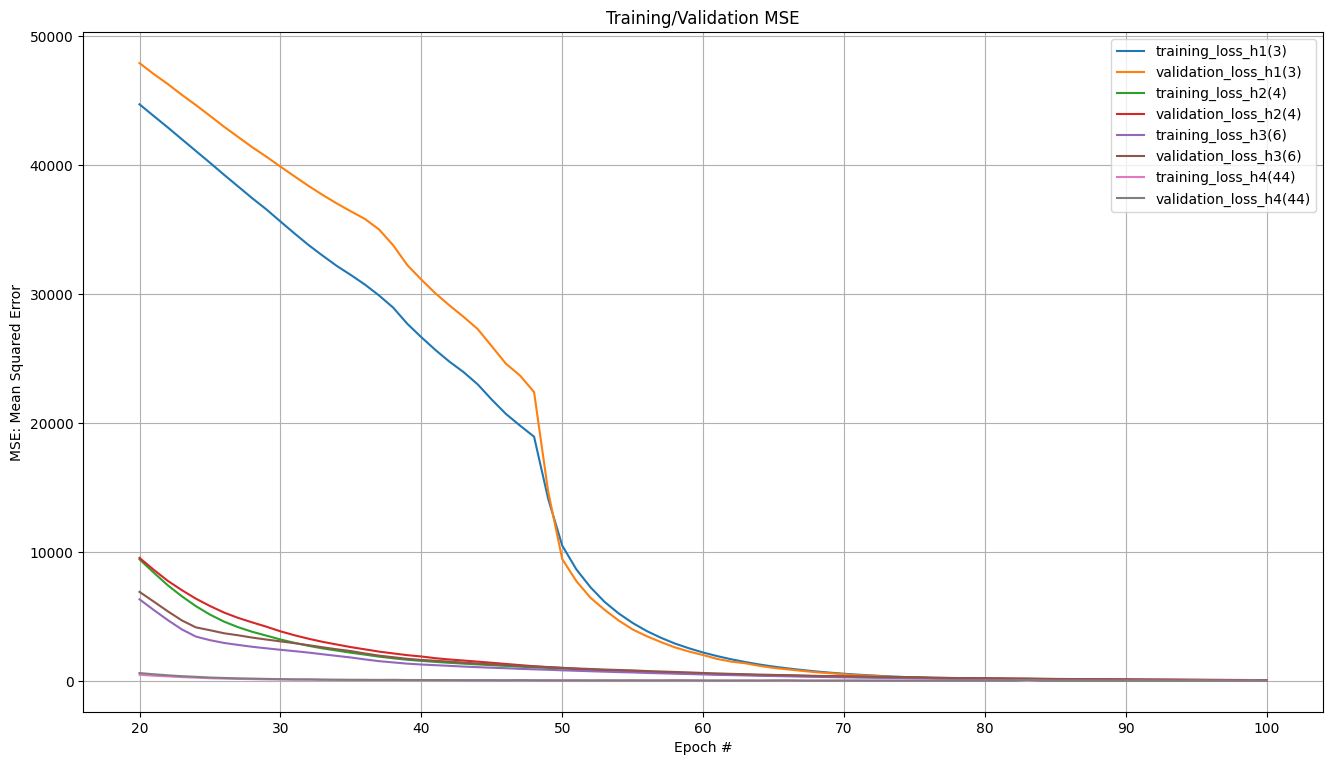

In [ ]:
plt.figure(figsize = (16, 9), dpi = 100)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("training_loss_{x}[(20 - 1):]".format(x = n_h1)),
    label = 'training_loss_h1({x})'.format(x = n_h1)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("validation_loss_{x}[(20 - 1):]".format(x = n_h1)),
    label = 'validation_loss_h1({x})'.format(x = n_h1)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("training_loss_{x}[(20 - 1):]".format(x = n_h2)),
    label = 'training_loss_h2({x})'.format(x = n_h2)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("validation_loss_{x}[(20 - 1):]".format(x = n_h2)),
    label = 'validation_loss_h2({x})'.format(x = n_h2)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("training_loss_{x}[(20 - 1):]".format(x = n_h3)),
    label = 'training_loss_h3({x})'.format(x = n_h3)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("validation_loss_{x}[(20 - 1):]".format(x = n_h3)),
    label = 'validation_loss_h3({x})'.format(x = n_h3)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("training_loss_{x}[(20 - 1):]".format(x = n_h4)),
    label = 'training_loss_h4({x})'.format(x = n_h4)
)
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    eval("validation_loss_{x}[(20 - 1):]".format(x = n_h4)),
    label = 'validation_loss_h4({x})'.format(x = n_h4)
)
plt.xlabel('Epoch #')
plt.ylabel('MSE: Mean Squared Error')
plt.title('Training/Validation MSE')
plt.legend() 
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

In [ ]:
train_loss_h1 = eval("training_loss_{x}".format(x = n_h1))
train_loss_h2 = eval("training_loss_{x}".format(x = n_h2))
train_loss_h3 = eval("training_loss_{x}".format(x = n_h3))
train_loss_h4 = eval("training_loss_{x}".format(x = n_h4))
val_loss_h1 = eval("validation_loss_{x}".format(x = n_h1))
val_loss_h2 = eval("validation_loss_{x}".format(x = n_h2))
val_loss_h3 = eval("validation_loss_{x}".format(x = n_h3))
val_loss_h4 = eval("validation_loss_{x}".format(x = n_h4))
mse_data = np.column_stack((train_loss_h1, val_loss_h1, 
                            train_loss_h2, val_loss_h2, 
                            train_loss_h3, val_loss_h3, 
                            train_loss_h4, val_loss_h4))
mse_columns_name = ['train_loss_h1', 'val_loss_h1', 
                    'train_loss_h2', 'val_loss_h2', 
                    'train_loss_h3', 'val_loss_h3', 
                    'train_loss_h4', 'val_loss_h4']
mse = pd.DataFrame(data = mse_data, columns = mse_columns_name)
mse

,train_loss_h1,val_loss_h1,train_loss_h2,val_loss_h2,train_loss_h3,val_loss_h3,train_loss_h4,val_loss_h4
0,82245.593750,84644.375000,77831.375000,80182.773438,79559.187500,82014.445312,71003.101562,73263.898438
1,80060.117188,82625.312500,69972.750000,72286.460938,72273.171875,74754.375000,36420.476562,36783.312500
2,76369.921875,79238.492188,59703.949219,61815.515625,60223.250000,62626.023438,23527.830078,22121.867188
3,71591.750000,74821.460938,48754.363281,50402.746094,47131.164062,48960.867188,19922.957031,18956.916016
4,66431.718750,69980.859375,39114.515625,39973.519531,37007.546875,37704.023438,15610.584961,15153.425781
...,...,...,...,...,...,...,...,...
95,23.209351,25.347521,80.238083,92.012634,60.644306,90.571762,21.224440,24.051760
96,21.837879,24.286160,77.593674,92.946800,56.452713,81.435043,24.102947,26.680202
97,20.800560,23.482330,72.364838,86.750168,52.157421,79.968620,21.338537,24.061676
98,19.987110,23.202211,69.310944,81.132668,48.695984,76.518524,27.862503,30.390465


In [ ]:
# we pick h* as size of hidden layer for the best performing MLP*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(keras.layers.Input(
    shape = (n_input, )
)) 
model.add(Dense(
    units = n_h4, 
    activation = 'relu'
))
model.add(Dense(
    units = n_output, 
    activation = 'relu'
))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 44)                748       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 45        
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


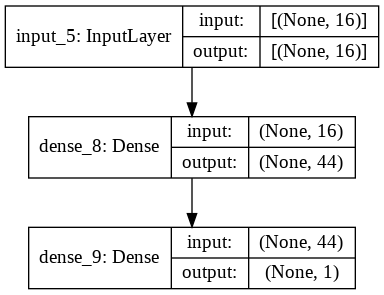

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model = model, 
    show_shapes = True, 
    show_layer_names = True
)

In [ ]:
from tensorflow.keras import optimizers, losses
# tune the learning rate
# the default of learning_rate is 0.001, we can change it to 0.01 to fasten the training procedure
optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()

# dir(losses)

In [ ]:
model.compile(optimizer = optimizer, loss = loss_fn)

In [ ]:
from tensorflow.keras import callbacks
import tensorflow as tf
# for recording training loss over the whole training set at the end of each epoch
class MyHistory(callbacks.Callback):
  def on_train_begin(self, logs = None):
    #self.real_loss = []
    self.gradient = []
    self.gradsNorm = []
    self.batch_loss = []
    self.epoch_loss = [] # epoch loss is exactly real loss. same things using different ways
  def on_epoch_end(self, epoch, logs = None):
    #Ypred = self.model.predict(X_train).flatten()
    #loss_value = self.model.loss(Y_train, Ypred)
    #self.real_loss.append(loss_value.numpy())
    with tf.GradientTape() as tape:
      Y_batch_pred = model(X_train, training = True)
      loss_val = loss_fn(Y_train,Y_batch_pred)
    grads = tape.gradient(loss_val, model.trainable_weights)
    self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grads])))
    self.gradient.append(grads)
    self.batch_loss.append(loss_val.numpy())
    epoch_loss_value = model.evaluate(X_train, Y_train, verbose = 0)
    self.epoch_loss.append(epoch_loss_value)
  
MyMonitor = MyHistory()

In [ ]:
# for saving the best model during the whole training process
checkpointer = callbacks.ModelCheckpoint(
    filepath = 'BestModel.h5', 
    monitor = 'val_loss', 
    save_best_only = True
)

In [ ]:
# train the model and store validation loss history in 'Monitor'
# Value of 'epoch' should vary according to your own training results.
Monitor = model.fit(
    x = X_train, 
    y = Y_train, 
    epochs = 500, 
    batch_size = 25, 
    validation_data = (X_test, Y_test),
    callbacks = [checkpointer, MyMonitor]
)

Epoch 1/500
33/33 [==============================] - 1s 9ms/step - loss: 80049.1351 - val_loss: 65140.5703
Epoch 2/500
33/33 [==============================] - 0s 3ms/step - loss: 56872.1612 - val_loss: 34246.8398
Epoch 3/500
33/33 [==============================] - 0s 3ms/step - loss: 31261.1327 - val_loss: 22550.7715
Epoch 4/500
33/33 [==============================] - 0s 3ms/step - loss: 22871.5623 - val_loss: 19400.2305
Epoch 5/500
33/33 [==============================] - 0s 3ms/step - loss: 19489.5560 - val_loss: 15813.6396
Epoch 6/500
33/33 [==============================] - 0s 3ms/step - loss: 15159.3126 - val_loss: 11483.4688
Epoch 7/500
33/33 [==============================] - 0s 3ms/step - loss: 10162.4132 - val_loss: 7298.7031
Epoch 8/500
33/33 [==============================] - 0s 3ms/step - loss: 6496.9611 - val_loss: 4270.1650
Epoch 9/500
33/33 [==============================] - 0s 3ms/step - loss: 3211.4090 - val_loss: 2785.5750
Epoch 10/500
33/33 [======================

In [ ]:
# len(X.columns)*n_hidden matrix of weights of arrow w(j,k) from input layer to hidden layer
W = model.layers[0].get_weights()[0]
W

array([[ 1.26386082e+00, -2.06611171e-01, -4.16107208e-01,
         7.60494888e-01, -3.13200653e-01, -3.42598408e-01,
         4.15415078e-01,  2.60216260e+00, -6.62843823e-01,
         1.13183987e+00, -1.05151176e-01,  5.15434325e-01,
         9.55239594e-01, -1.06695652e+00,  1.62092328e+00,
         1.18877304e+00,  4.27487850e-01,  7.97549337e-02,
         3.30963999e-01,  6.54851831e-03, -1.08060807e-01,
         6.39663458e-01,  7.09835470e-01, -1.49873674e-01,
        -3.00772607e-01,  6.15518689e-01,  7.43289769e-01,
        -3.09825152e-01,  1.24411738e+00,  5.16472757e-01,
         1.99173372e-02,  6.15962148e-01,  6.23948455e-01,
         6.93505168e-01,  3.79568130e-01,  1.04041159e+00,
         6.37141526e-01,  5.10477498e-02, -7.65507936e-01,
        -1.10964820e-01, -1.32230416e-01,  3.95206690e-01,
         6.74263537e-01,  2.06028789e-01],
       [-1.19617486e+00, -1.15252197e+00, -1.89402771e+00,
         1.52947575e-01,  2.47070408e+00, -1.12100351e+00,
         1.13

In [ ]:
# column vector [b_j] of all thresholds for hidden neurons j in hidden layer
B = model.layers[0].get_weights()[1]
B

array([ 5.210245  ,  2.5041916 ,  2.521217  ,  4.2602196 ,  7.1444597 ,
        2.7624156 , -6.367641  ,  5.450936  ,  2.0442088 ,  3.4073703 ,
       -0.56882036,  4.2712207 ,  4.8805966 ,  2.2925296 ,  2.279608  ,
        1.9589721 ,  4.337718  , -0.22391129,  4.2264824 , -0.1978154 ,
        2.7413282 ,  5.170119  ,  4.5503983 , -0.23817986, -0.68726546,
        4.5038643 ,  4.5955253 ,  2.1276016 ,  5.6271276 ,  5.028051  ,
        2.790407  ,  5.5981846 ,  4.466987  ,  4.6054273 ,  4.5790725 ,
        4.232705  ,  5.0465207 , -1.401     ,  2.5280132 , -0.23863459,
        2.4380615 ,  4.821044  ,  4.6897764 ,  3.8555605 ], dtype=float32)

In [ ]:
# column matrix of weights m(1, j) from hidden neuron j to output neuron 1
M = model.layers[1].get_weights()[0]
M

array([[ 2.8154213 ],
       [ 1.2379758 ],
       [ 0.6138772 ],
       [ 1.6096509 ],
       [ 5.493774  ],
       [ 1.093673  ],
       [-3.5173054 ],
       [ 3.736315  ],
       [ 1.1231457 ],
       [ 1.2434483 ],
       [-2.8081737 ],
       [ 1.5958536 ],
       [ 1.7171946 ],
       [ 0.5629793 ],
       [ 1.0343283 ],
       [ 0.8621422 ],
       [ 1.6939061 ],
       [-0.11058877],
       [ 1.632365  ],
       [-0.08662436],
       [ 1.0415978 ],
       [ 1.9480927 ],
       [ 1.88841   ],
       [-0.1560991 ],
       [-0.02377872],
       [ 1.9116623 ],
       [ 1.6788044 ],
       [ 0.42136985],
       [ 2.5448294 ],
       [ 1.9775614 ],
       [ 0.97815675],
       [ 2.482477  ],
       [ 1.8493445 ],
       [ 1.7880266 ],
       [ 1.6617358 ],
       [ 1.8631278 ],
       [ 1.5551113 ],
       [-0.60502076],
       [ 2.6829953 ],
       [-0.06986798],
       [ 1.1169214 ],
       [ 1.8055905 ],
       [ 1.6625342 ],
       [ 1.8102548 ]], dtype=float32)

In [ ]:
# single threshold for a single output neuron
C = model.layers[1].get_weights()[1]
C

array([2.5385327], dtype=float32)

In [ ]:
print(W.shape, B.shape, M.shape, C.shape)

(16, 44) (44,) (44, 1) (1,)


In [ ]:
pd.concat([pd.DataFrame(MyMonitor.batch_loss, columns = ['batch_loss']), 
           pd.DataFrame(MyMonitor.gradsNorm, columns = ['gradsNorm'])], 
          axis = 1)

,batch_loss,gradsNorm
0,65988.898438,5671.165396
1,38807.113281,6080.648546
2,25655.781250,3283.693486
3,21994.601562,2632.584272
4,18243.746094,2894.118036
...,...,...
495,2392.453613,3116.351117
496,2263.506592,2928.337242
497,2495.526855,3242.301746
498,2425.631104,3168.980482


In [ ]:
mse = pd.concat([pd.DataFrame(MyMonitor.epoch_loss, columns = ['epoch_loss']), 
                 pd.DataFrame(Monitor.history)], 
                axis = 1)
mse.iloc[:, [0, 2, 1]]
# epoch_loss: real training loss
# val_loss: validation/test loss  
# loss: not real training loss, it's the training loss for each batch, or we can say it's the average/mean of loss values, 
# and the quantity of loss values is that the number of case of the x_train divide by batch size in the "Monitor"

,epoch_loss,val_loss,loss
0,64375.472656,65140.570312,75833.351562
1,34580.437500,34246.839844,49479.578125
2,23567.537109,22550.771484,28057.609375
3,20344.744141,19400.230469,22156.298828
4,16256.299805,15813.639648,18536.412109
...,...,...,...
495,10.253334,13.750647,10.263991
496,19.036846,21.428282,10.587230
497,11.400968,15.040924,12.647234
498,10.817546,14.392189,11.571041


In [ ]:
last_epoch = len(pd.DataFrame(Monitor.history).index)

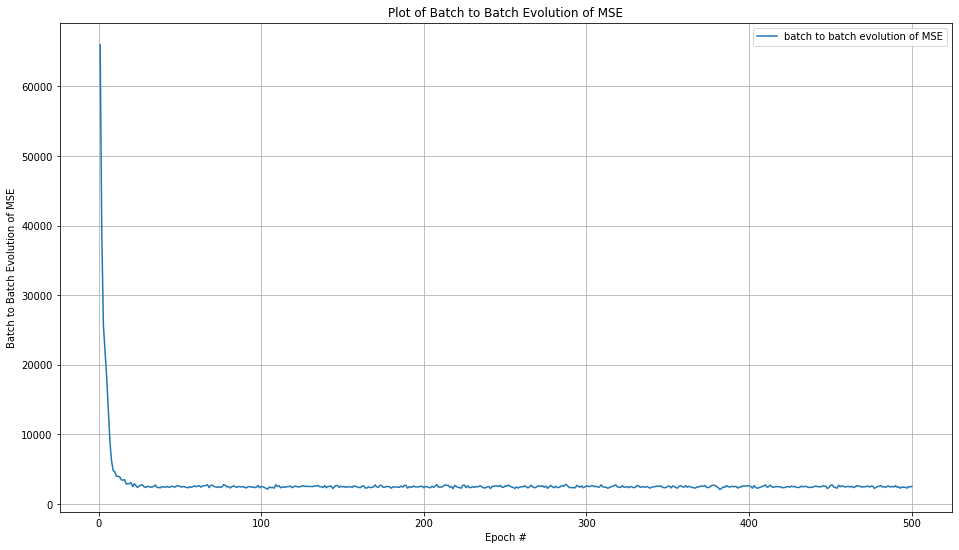

In [ ]:
# plot of batch to batch evolution of MSE
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    MyMonitor.batch_loss,
    label = 'batch to batch evolution of MSE'
)
plt.xlabel('Epoch #')
plt.ylabel('Batch to Batch Evolution of MSE')
plt.title('Plot of Batch to Batch Evolution of MSE')
plt.legend() 
plt.grid()
plt.show()

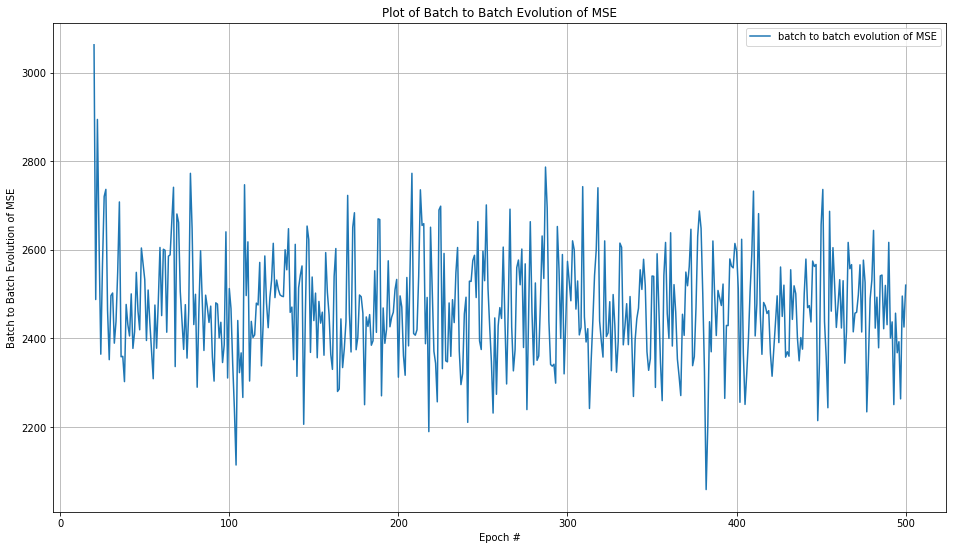

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(20, last_epoch + 1, 1), 
    MyMonitor.batch_loss[(20 - 1):],
    label = 'batch to batch evolution of MSE'
)
plt.xlabel('Epoch #')
plt.ylabel('Batch to Batch Evolution of MSE')
plt.title('Plot of Batch to Batch Evolution of MSE')
plt.legend() 
plt.grid()
plt.show()

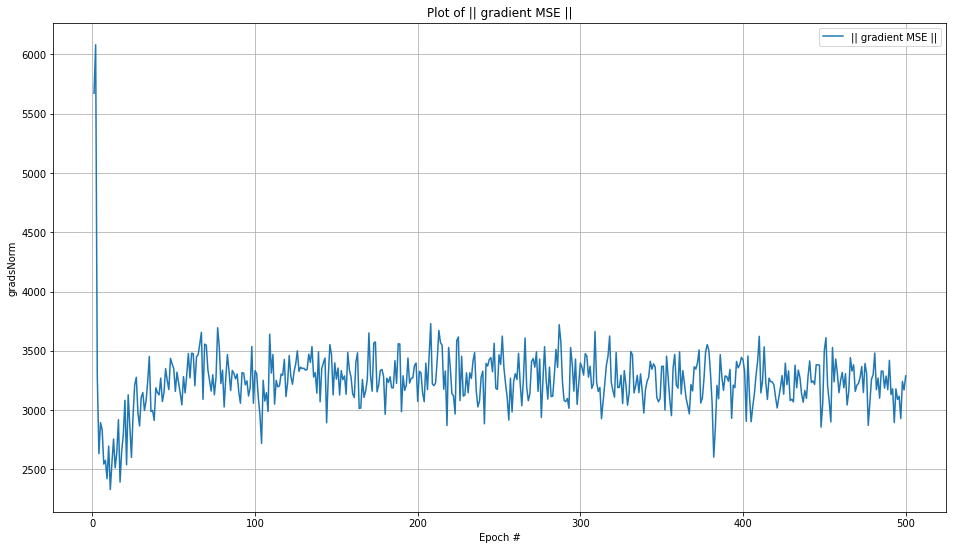

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    MyMonitor.gradsNorm,
    label = '|| gradient MSE ||'
)
plt.xlabel('Epoch #')
plt.ylabel('gradsNorm')
plt.title('Plot of || gradient MSE ||')
plt.legend() 
plt.grid()
plt.show()

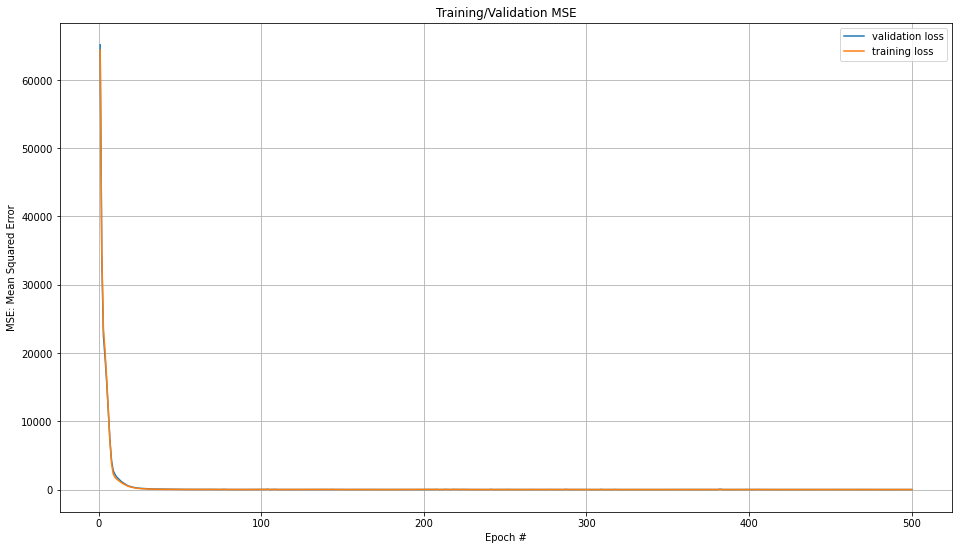

In [ ]:
# error plot
# plot n ->Gn = ||gradient_n||
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    Monitor.history['val_loss'],
    label = 'validation loss'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    MyMonitor.epoch_loss,
    label = 'training loss'
)
plt.xlabel('Epoch #')
plt.ylabel('MSE: Mean Squared Error')
plt.title('Training/Validation MSE')
plt.legend() 
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

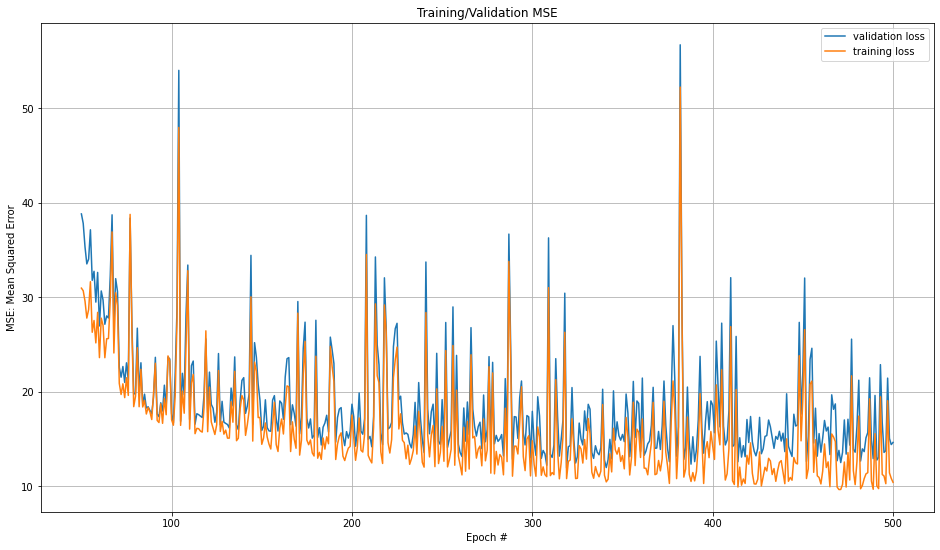

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(50, last_epoch + 1, 1), 
    (Monitor.history['val_loss'])[(50 - 1):],
    label = 'validation loss'
)
plt.plot(
    np.arange(50, last_epoch + 1, 1), 
    (MyMonitor.epoch_loss)[(50 - 1):],
    label = 'training loss'
)
plt.xlabel('Epoch #')
plt.ylabel('MSE: Mean Squared Error')
plt.title('Training/Validation MSE')
plt.legend() 
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

In [ ]:
# Underfitting if: training loss > validation loss
# Overfitting if: training loss < validation loss
# Perfect fitting if: training loss = validation loss
# Our aim is to make the validation loss as low as possible.

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 14.6220


14.621992111206055

In [ ]:
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('BestModel.h5')
best_model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 11.9104


11.910400390625

In [ ]:
Y_pred = pd.DataFrame(
    data = best_model.predict(X_test), 
    columns = ['Y_pred'], 
    index = Y_test.index
)
# Y_test = Y_test.rename('Y_test')
pd.concat([Y_test, Y_pred], axis = 1).sort_index(ascending = True)

SPY(t+1)      Y_pred
Year Month Day                        
2017 2     7    229.240005  230.967651
           13   233.699997  233.953278
           16   235.089996  235.642090
           27   236.470001  237.791595
     3     16   237.029999  238.981033
...                    ...         ...
2021 1     13   378.459991  378.407166
           14   375.700012  376.192444
           19   383.890015  376.001892
           27   377.630005  376.780945
           28   370.070007  379.789337

[201 rows x 2 columns]

In [ ]:
RMSE = ( sum( Y_test.subtract( Y_pred.squeeze().sort_index(ascending = True) )**2 ) / len(Y_pred) )**0.5
print(RMSE, "\n")
Performance = RMSE / np.mean(Y_test)
print(Performance)

3.4511448474417494 

0.01192168195852761


In [ ]:
# to access hidden layer activity, use bestModel.layers[0] as a function.

In [ ]:
whole_data = pd.concat([pd.DataFrame(X_test, index = Y_test.index), 
                        pd.DataFrame(X_train, index = Y_train.index)]
                       ).sort_index().to_numpy()
av_j = np.mean(best_model.layers[0](whole_data).numpy(), axis = 0)
av_j = pd.DataFrame(av_j, index = np.arange(1, av_j.shape[0] + 1, 1), 
                    columns = ['avg_activity']
                    )

In [ ]:
av_j.sort_values(by = ['avg_activity'], ascending = True, inplace = True)
av_j

,avg_activity
40,0.000000
25,0.000000
24,0.000000
20,0.000000
18,0.000000
38,0.275079
11,0.824899
16,3.091882
28,3.119841
14,3.142179


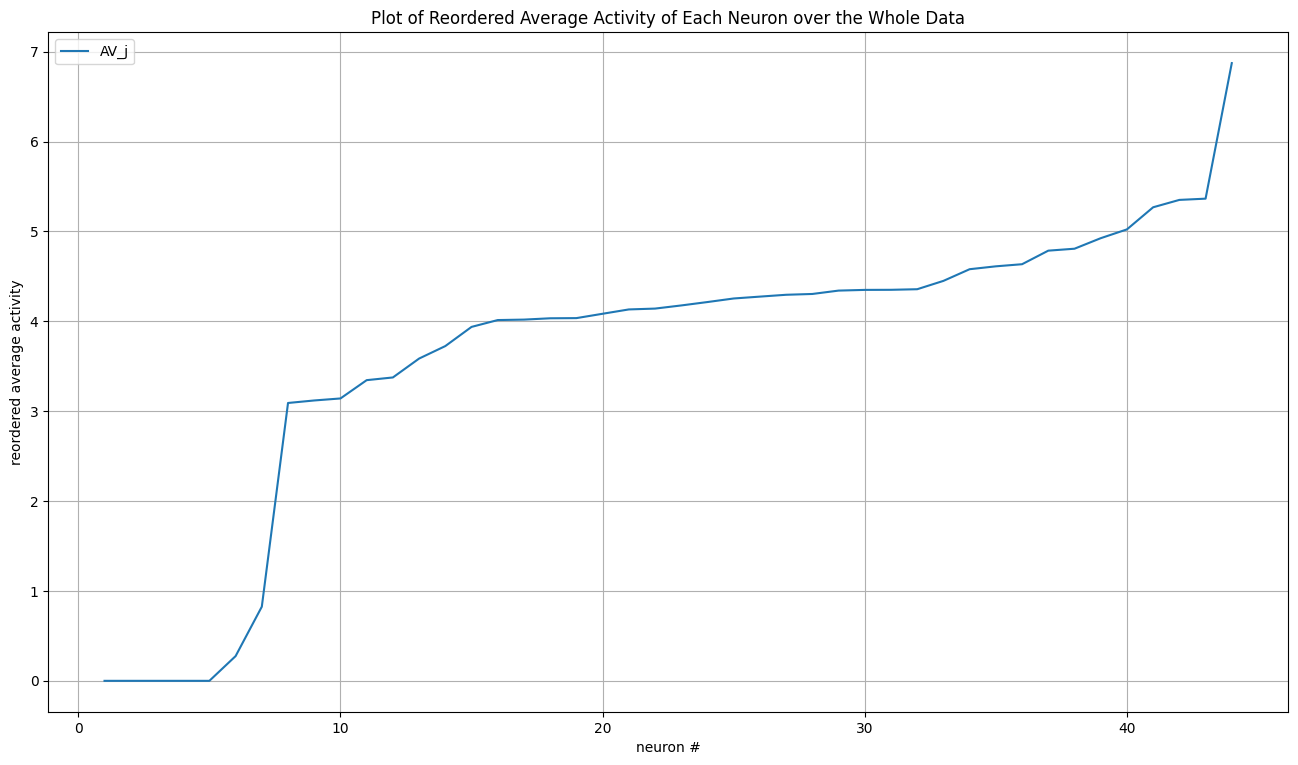

In [ ]:
plt.figure(figsize = (16, 9), dpi = 100)
plt.plot(
    np.arange(1, av_j.shape[0] + 1, 1), 
    av_j,
    label = 'AV_j'
)
plt.xlabel('neuron #')
plt.ylabel('reordered average activity')
plt.title('Plot of Reordered Average Activity of Each Neuron over the Whole Data')
plt.legend() 
plt.grid()
plt.show()

In [ ]:
most_avg_act = av_j[-3:][::-1] # three most active hidden NR_j
most_avg_act

,avg_activity
5,6.873773
29,5.365425
32,5.351597


In [ ]:
a = most_avg_act.index[0] # denote NR_a as the most active hidden neuron NR_j
a

5

In [ ]:
# weights for most active hidden neuron
w = W[:, a-1]
w = pd.DataFrame(data = w, index = X.columns, columns = ['weights'])
w.T # list the "len(X.columns)" weights

,SPY(t),AAPL(t),MSFT(t),AMZN(t),SPY(t-1),AAPL(t-1),MSFT(t-1),AMZN(t-1),SPY(t-2),AAPL(t-2),MSFT(t-2),AMZN(t-2),SPY(t-3),AAPL(t-3),MSFT(t-3),AMZN(t-3)
weights,-0.313201,2.470704,-0.457467,-0.027554,-1.156938,2.269547,-0.335586,0.207482,-1.310526,2.12818,0.072235,0.173914,-1.531346,2.318938,-0.364638,0.124502


In [ ]:
# order these "len(X.columns)" weights by decreasing values w(i1, a) > w(i2, a) > ... > w(i16, a)
w.sort_values(by = ['weights'], ascending = False, inplace =True)
w.T

,AAPL(t),AAPL(t-3),AAPL(t-1),AAPL(t-2),AMZN(t-1),AMZN(t-2),AMZN(t-3),MSFT(t-2),AMZN(t),SPY(t),MSFT(t-1),MSFT(t-3),MSFT(t),SPY(t-1),SPY(t-2),SPY(t-3)
weights,2.470704,2.318938,2.269547,2.12818,0.207482,0.173914,0.124502,0.072235,-0.027554,-0.313201,-0.335586,-0.364638,-0.457467,-1.156938,-1.310526,-1.531346


In [ ]:
least_avg_act = av_j[0:3] # three most inactive hidden NR_j
least_avg_act

,avg_activity
40,0.0
25,0.0
24,0.0


In [ ]:
b = least_avg_act.index[0] # denote NR_b as the most inactive hidden neuron NR_j
b

40

In [ ]:
# weights for most inactive hidden neuron
w1 = W[:, b-1]
w1 = pd.DataFrame(data = w1, index = X.columns, columns = ['weights'])
w1.T

,SPY(t),AAPL(t),MSFT(t),AMZN(t),SPY(t-1),AAPL(t-1),MSFT(t-1),AMZN(t-1),SPY(t-2),AAPL(t-2),MSFT(t-2),AMZN(t-2),SPY(t-3),AAPL(t-3),MSFT(t-3),AMZN(t-3)
weights,-0.110965,0.161829,-0.189188,-0.06922,0.153825,-0.032193,0.080256,-0.132758,0.026017,-0.200116,0.225598,0.194198,-0.008197,-0.094438,-0.291754,0.140805


In [ ]:
w1.sort_values(by = ['weights'], ascending = False, inplace =True)
w1.T

,MSFT(t-2),AMZN(t-2),AAPL(t),SPY(t-1),AMZN(t-3),MSFT(t-1),SPY(t-2),SPY(t-3),AAPL(t-1),AMZN(t),AAPL(t-3),SPY(t),AMZN(t-1),MSFT(t),AAPL(t-2),MSFT(t-3)
weights,0.225598,0.194198,0.161829,0.153825,0.140805,0.080256,0.026017,-0.008197,-0.032193,-0.06922,-0.094438,-0.110965,-0.132758,-0.189188,-0.200116,-0.291754


In [ ]:
avg_act_X_train = pd.DataFrame(np.mean(best_model.layers[0](X_train).numpy(), axis = 1), 
                               index = Y_train.index, 
                               columns = ['Avg_Activity']
                               )
avg_act_X_test = pd.DataFrame(np.mean(best_model.layers[0](X_test).numpy(), axis = 1), 
                              index = Y_test.index, 
                              columns = ['Avg_Activity']
                              )
avg_activity = pd.concat([avg_act_X_train, avg_act_X_test]).sort_index()
avg_activity['index'] = np.arange(1, X.shape[0] + 1, 1)

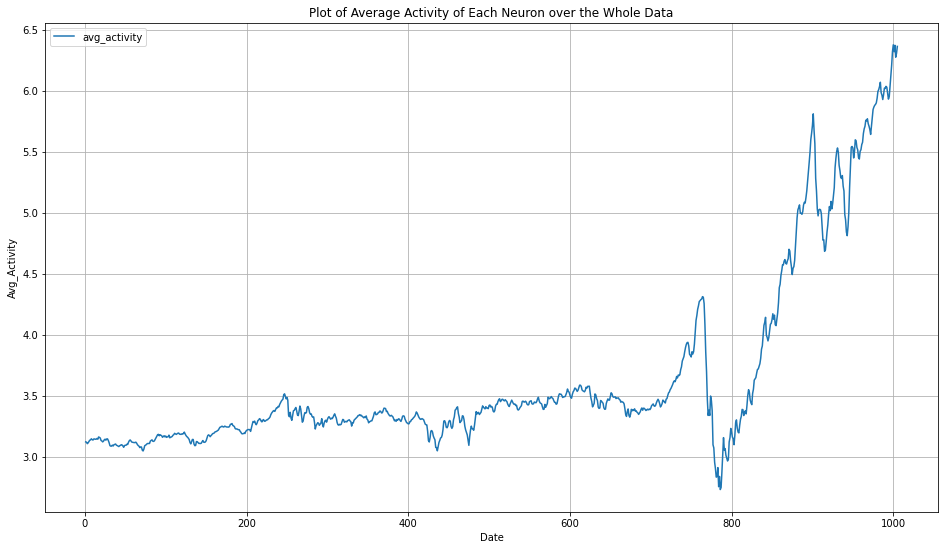

In [ ]:
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(1, X.shape[0] + 1, 1), 
    avg_activity.loc[:, 'Avg_Activity'],
    label = 'avg_activity'
)

plt.xlabel('Date')
plt.ylabel('Avg_Activity')
plt.title('Plot of Average Activity of Each Neuron over the Whole Data')
plt.legend() 
plt.grid()
plt.show()

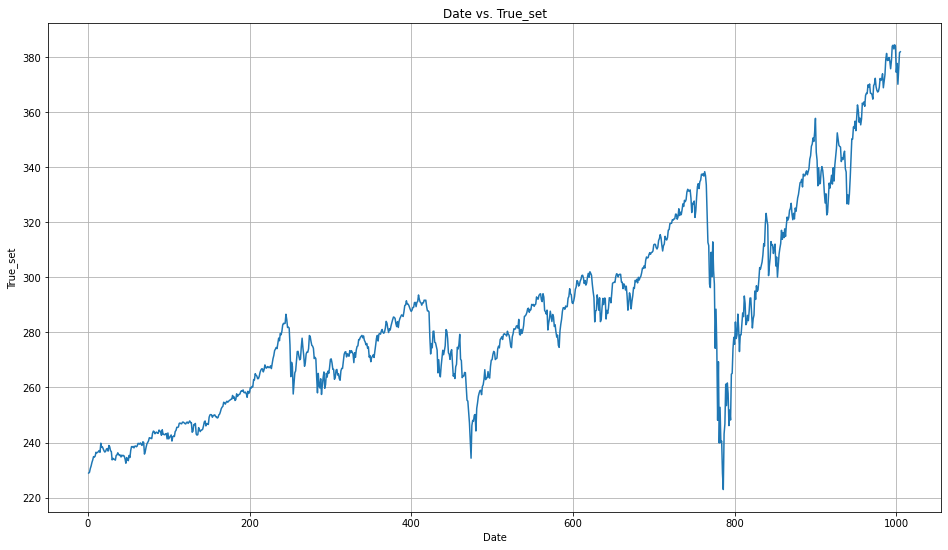

In [ ]:
# compare the shape between avg_activity and true_set
plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(1, Y.shape[0] + 1, 1), 
    Y
)
plt.title('Date vs. True_set')
plt.xlabel('Date')
plt.ylabel('True_set')
plt.grid()
plt.show()

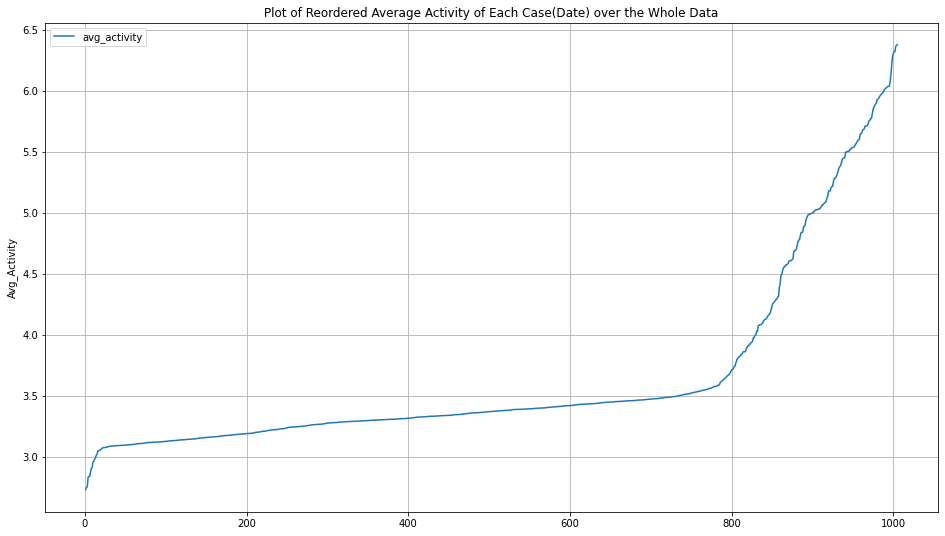

In [ ]:
avg_activity.sort_values(by = ['Avg_Activity'], ascending = True, inplace =True)

plt.figure(figsize = (16, 9))
plt.plot(
    np.arange(1, X.shape[0] + 1, 1), 
    avg_activity.loc[:, 'Avg_Activity'],
    label = 'avg_activity'
)
plt.ylabel('Avg_Activity')
plt.title('Plot of Reordered Average Activity of Each Case(Date) over the Whole Data')
plt.legend() 
plt.grid()
plt.show()

In [ ]:
t1_stop = process_time()
print(f"\nElapsed time (mins): {(t1_stop - t1_start)/60:.6f}")


Elapsed time (mins): 4.414694
